In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import fft
from scipy.signal.windows import hann, gaussian, exponential, chebwin
from scipy import signal 


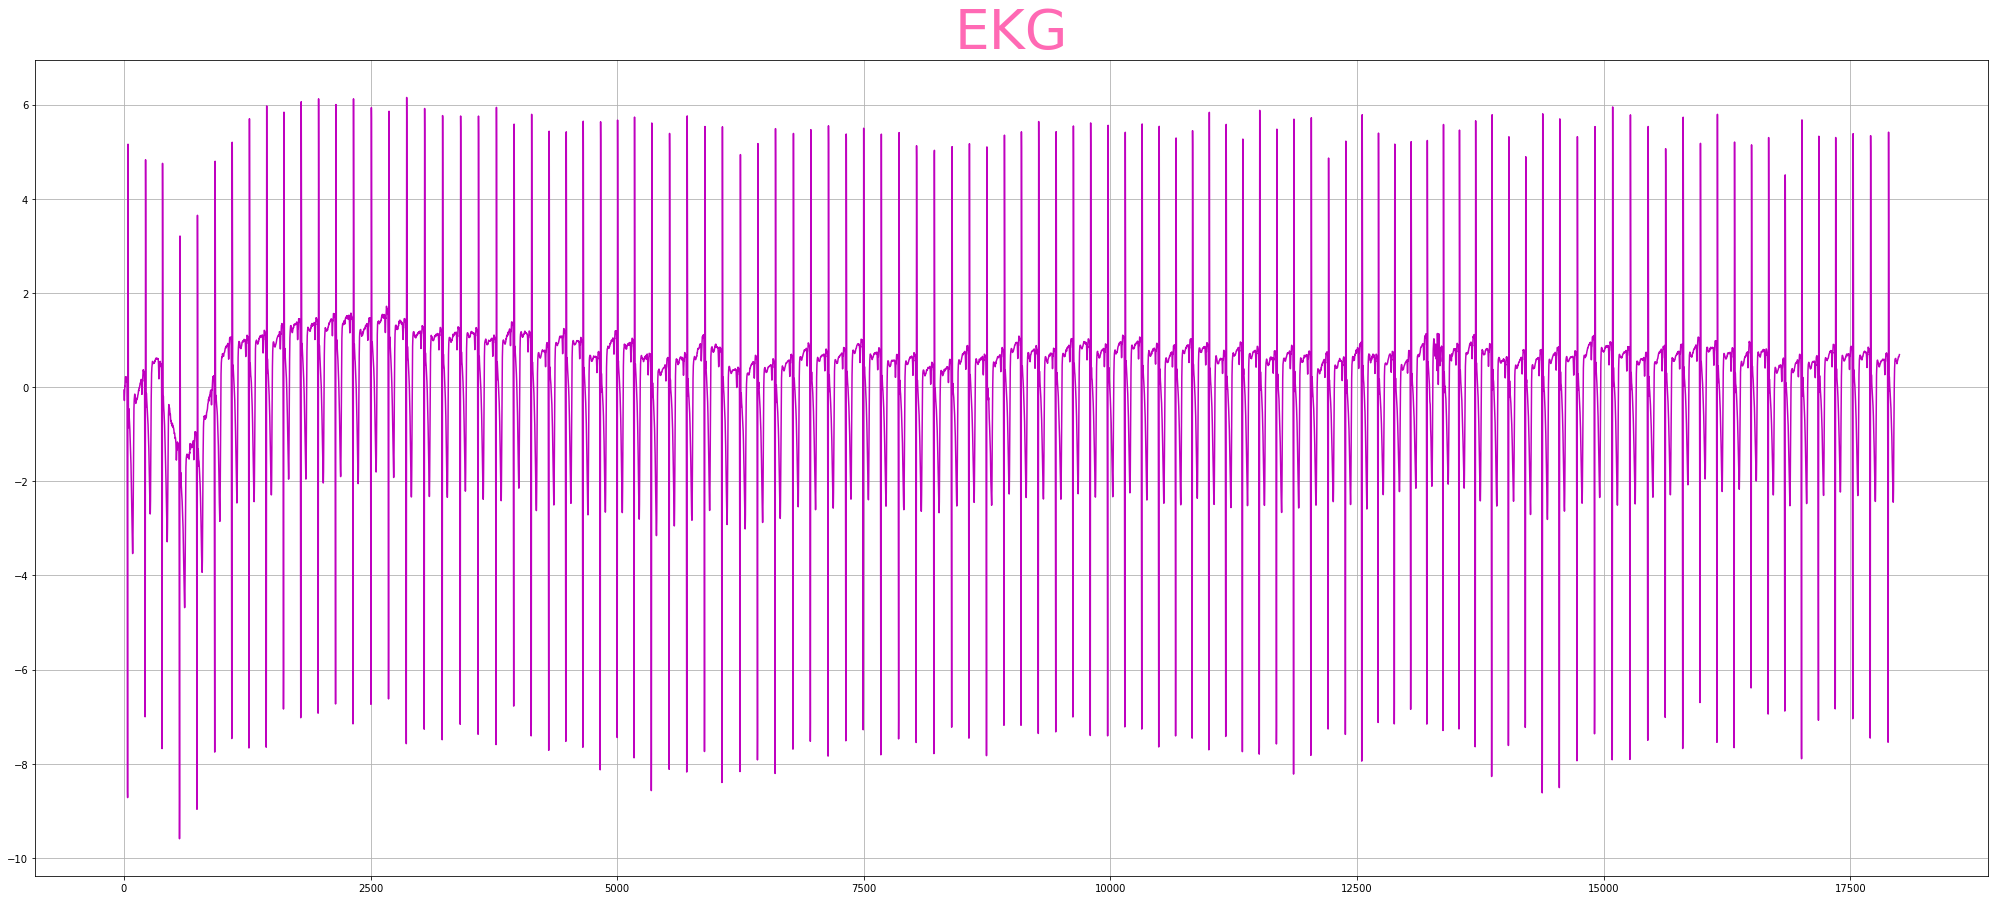

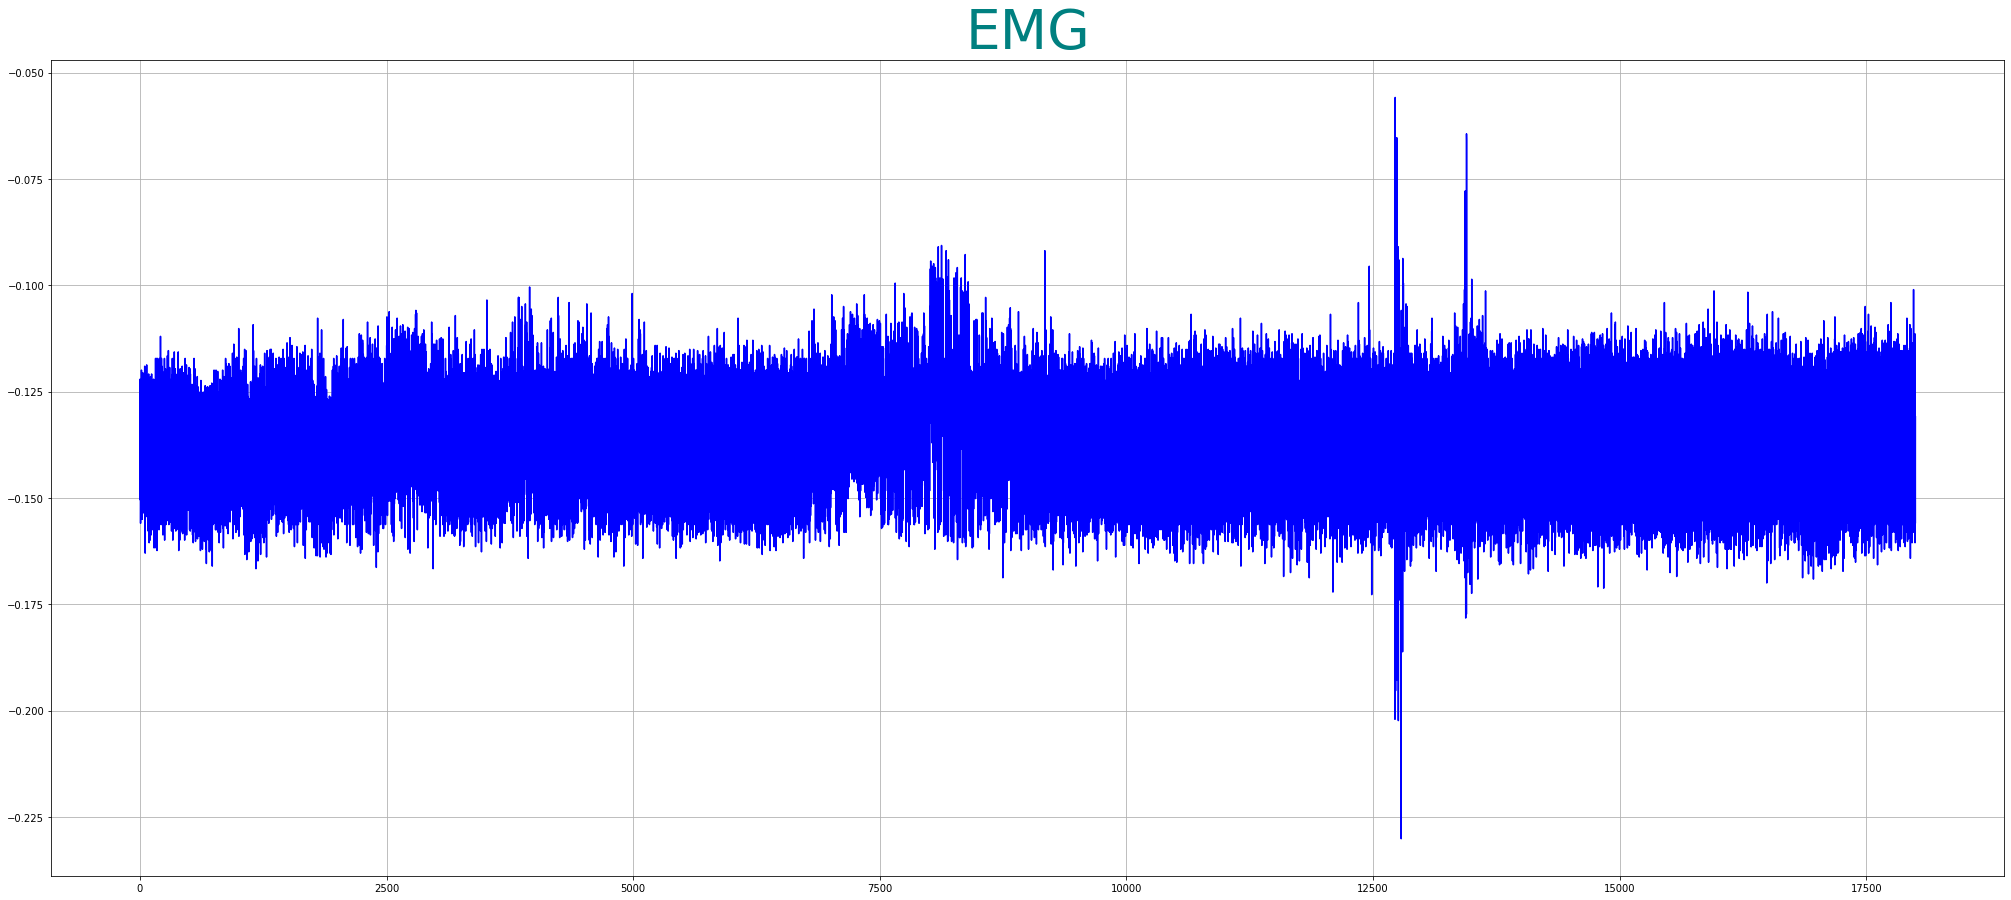

In [5]:

def abre(path, file_name):
    data = np.loadtxt(path+file_name, delimiter='\t', dtype='str')
    data = data[:-1,:-1].T.astype('float') #Elimina la última fila y columna que no contienen nada
    
    return data

path = '/home/edu/Documents/GitHub/MCIB-19-P-Edu/data/P1/' #Cambiar dependiendo de la compu
file = 'Apnea1.txt'


signals = abre(path,file)

EKG = signals[1]
EMG = signals[3]

#Graficas
plt.figure('EKG',figsize=(35,15))
plt.plot(EKG, 'm')
plt.grid()
plt.title('EKG', size=(55)).set_color(color='hotpink')

plt.figure('EMG', figsize=(35,15))
plt.title('EMG', size=(55)).set_color(color='teal')
plt.plot(EMG, 'b')
plt.grid()

plt.show()

In [6]:
def compfft(signal):
    s_f = fft(signal) # fft de la señal original
    #Obtenemos las ventanas hanning, gaussiana, exponencial y chevy
    wh = hann(signal.shape[0])
    wg = gaussian(signal.shape[0],0.5)
    we = exponential(signal.shape[0])
    wb = chebwin(signal.shape[0],100)
    #multiplicacion de ventana por la señal
    Eh = wh*signal 
    Eg = wg*signal
    Ee = we*signal
    Eb = wb*signal
    
    Fh = 20*np.log10(np.abs(fft(Eh)))
    Fg = 20*np.log10(np.abs(fft(Eg)))
    Fe = 20*np.log10(np.abs(fft(Ee)))
    Fb = 20*np.log10(np.abs(fft(Eb)))    
    #Graficas fft's
    plt.figure('FFT',figsize=(10,5))
    plt.title('FFT', fontsize=55).set_color(color='red')
    plt.grid()
   # plt.plot(s_f[2:len(s_f)//2], 'k')
    plt.plot(Fh[2:len(Fh)//2], 'm')
    plt.plot(Fg[2:len(Fg)//2], color='blue')
    plt.plot(Fe[2:len(Fe)//2], color='red')
    plt.plot(Fb[2:len(Fb)//2], color='green')
    plt.xlabel('Frecuencia en muestras', fontsize=50).set_color(color='white')


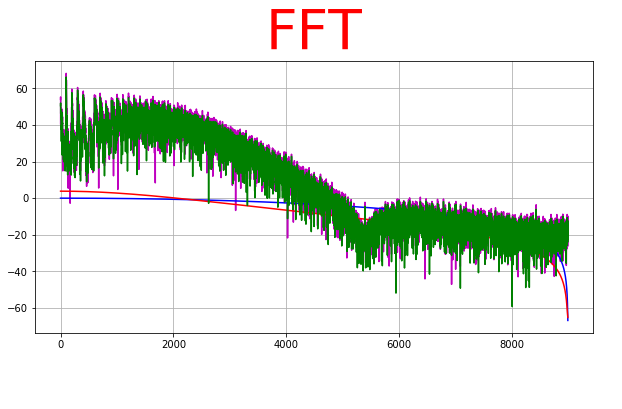

In [7]:
compfft(EKG)



In [15]:
# Funcion para evaluar la respuesta en frecuencia de cualquier filtro
# diseñamos un filtro pasa banda butterworth de N orden
def butterbp(cutoff, cutoff2, fs, order):
    Fc1 = np.array([cutoff, cutoff2])*2/fs
    b, a = signal.butter(order, Fc1 , btype='bandpass')

    w, h = signal.freqz(b, a)
    fig = plt.figure()
    plt.title('Digital filter frequency response').set_color(color = 'white')
    ax1 = fig.add_subplot(111)

    plt.plot(w, 20 * np.log10(abs(h)), 'b')
    plt.ylabel('Amplitude [dB]', color='b')
    plt.xlabel('Frequency [rad/sample]').set_color(color = 'white')

    ax2 = ax1.twinx()
    angles = np.unwrap(np.angle(h))
    plt.plot(w, angles, 'g')
    plt.ylabel('Angle (radians)', color='g')
    plt.grid()
    plt.axis('tight')
    plt.show()
    
    return b, a

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


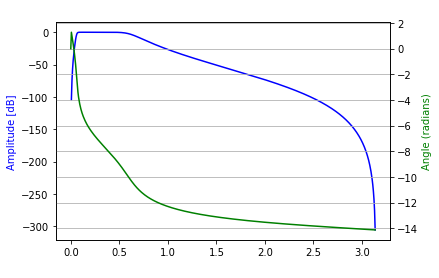

(array([ 0.00073679,  0.        , -0.00368395,  0.        ,  0.00736791,
         0.        , -0.00736791,  0.        ,  0.00368395,  0.        ,
        -0.00073679]),
 array([  1.        ,  -8.060718  ,  29.41828703, -64.0695838 ,
         92.27470714, -91.87183861,  64.05569701, -30.88594809,
          9.85656297,  -1.87986537,   0.16269975]))

In [16]:
butterbp(5, 50, 512, 5)

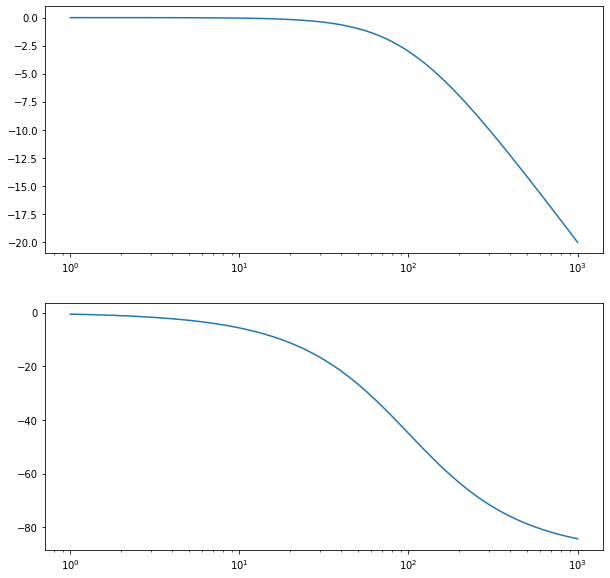

In [10]:
# creando el filtro desde cero dando valores a "a" y "b"
sys1 = signal.lti(1, [1 / 100, 1]) # Creamos el sistema pasabajas primer orden
w, mag, phase = signal.bode(sys1) # Diagrama de bode: frecuencias, magnitud y fase
fig, axs= plt.subplots(2, 1, figsize=(10, 10))
axs[0].semilogx(w, mag) # Ejes logaritmicos
axs[1].semilogx(w, phase) 

In [11]:
help('matplotlib.pyplot.semilogx')

Help on function semilogx in matplotlib.pyplot:

matplotlib.pyplot.semilogx = semilogx(*args, **kwargs)
    Make a plot with log scaling on the x axis.
    
    Call signatures::
    
        semilogx([x], y, [fmt], data=None, **kwargs)
        semilogx([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    This is just a thin wrapper around `.plot` which additionally changes
    the x-axis to log scaling. All of the concepts and parameters of plot
    can be used here as well.
    
    The additional parameters *basex*, *subsx* and *nonposx* control the
    x-axis properties. They are just forwarded to `.Axes.set_xscale`.
    
    Parameters
    ----------
    basex : scalar, optional, default 10
        Base of the x logarithm.
    
    subsx : array_like, optional
        The location of the minor xticks. If *None*, reasonable locations
        are automatically chosen depending on the number of decades in the
        plot. See `.Axes.set_xscale` for details.
    
    nonposx : {'

In [17]:
signal.shape

AttributeError: module 'scipy.signal' has no attribute 'shape'